In [2]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))


df = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

# Peso inicial:

In [4]:
print("df pesa: " + str(df.memory_usage().sum() / 1024 / 1024) + " MB")

df pesa: 42.1143798828125 MB


In [5]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

## Empiezo a ver columna por columna si puedo ahorrarme memoria y como tratar los nulls si es que tienen.

Para ahorrarme memoria voy a ver entre que valor y que valor se distribuyen las distintas columnas numericas y así poder convertir al tipo de dato que encuentre mas conveniente

### Metros Cubiertos

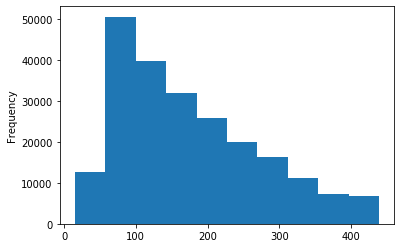

In [6]:
#Metros cubiertos está siempre entre 0 y 500
#Puedo usar np.int16
df['metroscubiertos'].plot(kind='hist')

In [7]:
df['metroscubiertos'].isnull().sum()

17400

In [8]:
df['metroscubiertos'].mean()

174.01677448337827

In [9]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
df['metroscubiertos']=df['metroscubiertos'].fillna(round(df['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
df['metroscubiertos']=df['metroscubiertos'].astype(np.int16)

### Metros totales

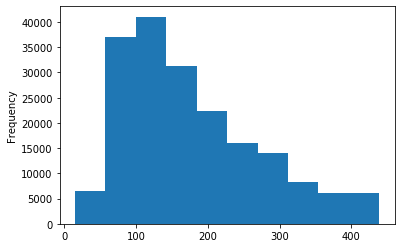

In [10]:
#Metros totales está siempre entre 0 y 500
df['metrostotales'].plot(kind='hist')

In [11]:
df['metrostotales'].isnull().sum()

51467

In [12]:
df['metrostotales'].mean()

176.76514456355122

In [13]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
df['metrostotales']=df['metrostotales'].fillna(round(df['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
df['metrostotales']=df['metrostotales'].astype(np.int16)

### Habitaciones

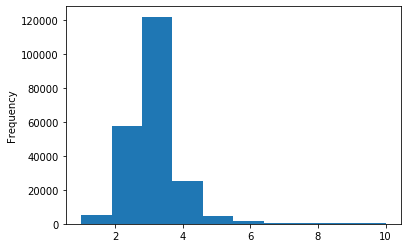

In [14]:
#Para habitaciones conviene usar np.int8
df['habitaciones'].plot(kind='hist')

In [15]:
df['habitaciones'].isnull().sum()

22471

In [16]:
df.groupby('habitaciones')['precio'].mean().astype(np.int32)

habitaciones
1.0     1806074
2.0     1616899
3.0     2769606
4.0     3494388
5.0     3284971
6.0     3165558
7.0     3562563
8.0     3432464
9.0     3936173
10.0    4520161
Name: precio, dtype: int32

In [17]:
df[df['habitaciones'].isnull()]['precio'].mean().astype(np.int32)

2394184

In [18]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
df['habitaciones']=df['habitaciones'].fillna(3)
#Luego convierto a np.int8
df['habitaciones']=df['habitaciones'].astype(np.int8)

### Latitud y longitud

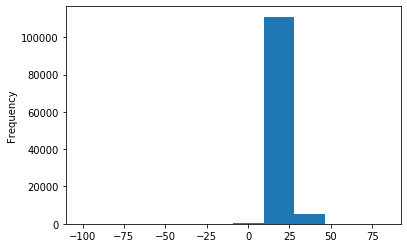

In [19]:
df['lat'].plot(kind='hist')

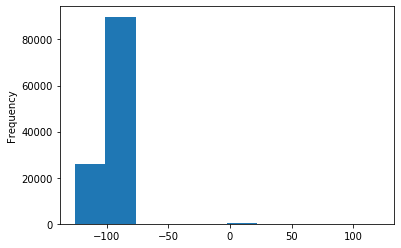

In [20]:
df['lng'].plot(kind='hist')

In [21]:
df['lat'].isnull().sum()
#Como deberia rellenar los nulls de latitud y longitud?

123488

### Antiguedad

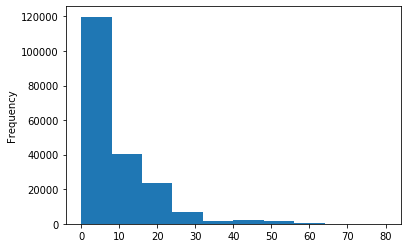

In [22]:
#Antiguedad va de 0 a 80. Conviene usar np.uint8
df['antiguedad'].plot(kind='hist')

In [23]:
df['antiguedad'].isnull().sum()

43555

In [24]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
df['antiguedad']=df['antiguedad'].fillna(round(df['antiguedad'].mean()))
#Luego convierto a np.uint8
df['antiguedad']=df['antiguedad'].astype(np.int8)

### Garages

In [25]:
#Para garages uso np.int8
df['garages'].value_counts()

2.0    94167
1.0    59464
0.0    26926
3.0    21678
Name: garages, dtype: int64

In [26]:
df['garages'].isnull().sum()

37765

In [27]:
df.groupby('garages')['precio'].mean().astype(np.int32)

garages
0.0    2033282
1.0    1346327
2.0    2644485
3.0    4293016
Name: precio, dtype: int32

In [28]:
df[df['garages'].isnull()]['precio'].mean().astype(np.int32)

3455786

In [29]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
df['garages']=df['garages'].fillna(2)

In [30]:
#convierto a np.int8
df['garages']=df['garages'].astype(np.int8)

### Baños

In [31]:
#Para garages uso np.int8
df['banos'].value_counts()

2.0    87683
1.0    58173
3.0    49365
4.0    18558
Name: banos, dtype: int64

In [32]:
df['banos'].isnull().sum()

26221

In [33]:
df.groupby('banos')['precio'].mean().astype(np.int32)

banos
1.0    1041801
2.0    2317529
3.0    3701016
4.0    4449123
Name: precio, dtype: int32

In [34]:
df[df['banos'].isnull()]['precio'].mean().astype(np.int32)

2986957

In [35]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
df['banos']=df['banos'].fillna(2)

In [36]:
#convierto a np.int8
df['banos']=df['banos'].astype(np.int8)

### Gimnasio

In [37]:
#Para gimnasio uso np.int8
df['gimnasio'].value_counts()

0.0    225006
1.0     14994
Name: gimnasio, dtype: int64

In [38]:
df['gimnasio'].isnull().sum()

0

In [39]:
df['gimnasio']=df['gimnasio'].astype(np.int8)

### Usos multiples

In [40]:
#Para usosmultiples uso np.int8
df['usosmultiples'].value_counts()

0.0    226778
1.0     13222
Name: usosmultiples, dtype: int64

In [41]:
df['usosmultiples'].isnull().sum()

0

In [42]:
df['usosmultiples']=df['usosmultiples'].astype(np.int8)

### Piscina

In [43]:
#Para piscina uso np.int8
df['piscina'].value_counts()

0.0    219028
1.0     20972
Name: piscina, dtype: int64

In [44]:
df['piscina'].isnull().sum()

0

In [45]:
df['piscina']=df['piscina'].astype(np.int8)

### Escuelas cercanas

In [46]:
#Para escuelascercanas uso np.int8
df['escuelascercanas'].value_counts()

0.0    133406
1.0    106594
Name: escuelascercanas, dtype: int64

In [47]:
df['escuelascercanas'].isnull().sum()

0

In [48]:
df['escuelascercanas']=df['escuelascercanas'].astype(np.int8)

### Centros comerciales cercanos

In [49]:
#Para centroscomercialescercanos uso np.int8
df['centroscomercialescercanos'].value_counts()

0.0    144832
1.0     95168
Name: centroscomercialescercanos, dtype: int64

In [50]:
df['centroscomercialescercanos'].isnull().sum()

0

In [51]:
df['centroscomercialescercanos']=df['centroscomercialescercanos'].astype(np.int8)

### Provincia

In [52]:
df['provincia'].isnull().sum()

155

In [53]:
#Creo categoria para los que no tienen categoria en provincia:
df['provincia']=df['provincia'].fillna('N/A')

### Ciudad

In [54]:
df['ciudad'].isnull().sum()

372

In [55]:
#Creo categoria para los que no tienen categoria en ciudad:
df['ciudad']=df['ciudad'].fillna('N/A')

### Titulo y descripcion

In [56]:
df['descripcion'].isnull().sum()

1619

In [57]:
df['titulo'].isnull().sum()

5387

In [58]:
df['titulo']=df['titulo'].fillna(' ')
df['descripcion']=df['descripcion'].fillna(' ')

### Tipo de propiedad

In [59]:
df['tipodepropiedad'].isnull().sum()

46

In [60]:
df['tipodepropiedad']=df['tipodepropiedad'].fillna('N/A')

### Direccion

In [61]:
df['direccion'].value_counts()

-                                           660
.                                           476
1                                           212
Calle                                       194
Norte de Mérida                             136
                                           ... 
Avenida hacienda de los eucaliptos #82-7      1
Pedro de Alvarado                             1
AV. OBSIDIANA                                 1
Paseo Puesta del Sol 4150, Zapopan            1
LA ZUIZA                                      1
Name: direccion, Length: 140269, dtype: int64

In [62]:
df['direccion'].isnull().sum()

53072

In [63]:
#Relleno los nulls en direccion con un - .
df['direccion']=df['direccion'].fillna('-')

### Idzona

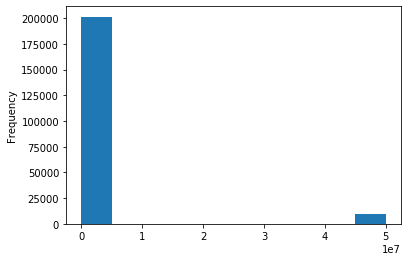

In [64]:
df['idzona'].plot(kind='hist')

In [65]:
df['idzona'].isnull().sum()
#No se exactamente como rellenar los nulls para esta columna.

28621

## Precio

In [67]:
df['precio'].max()

12525000.0

In [68]:
df['precio'].min()

310000.0

In [67]:
df['precio'].isnull().sum()

0

In [ ]:
#ID va de 310000.0 a 12525000.0
#Podemos usar np.int32

In [69]:
df['precio']=df['precio'].astype(np.int32)

## Id

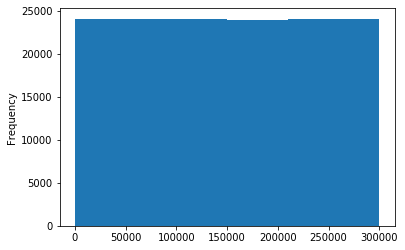

In [75]:
#ID va de 0 a 300000
#Podemos usar np.int32
df['id'].plot(kind='hist')

In [76]:
df['id']=df['id'].astype(np.int32)

## Peso final:

In [77]:
print("df pesa: " + str(df.memory_usage().sum() / 1024 / 1024) + " MB")

df pesa: 23.1171875 MB


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int32
titulo                        240000 non-null object
descripcion                   240000 non-null object
tipodepropiedad               240000 non-null object
direccion                     240000 non-null object
ciudad                        240000 non-null object
provincia                     240000 non-null object
antiguedad                    240000 non-null int8
habitaciones                  240000 non-null int8
garages                       240000 non-null int8
banos                         240000 non-null int8
metroscubiertos               240000 non-null int16
metrostotales                 240000 non-null int16
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null dat